In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

In [20]:
#Data collection and Analysis


In [21]:
df = pd.read_csv('C:/Users/Jojo/Downloads/diabetes.csv')

In [22]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()
#check for missing values, count them and print the sum for every column
df.isnull().sum() #conclusion :- there are no null values in this dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

In [25]:
#Statistics of entries in dataframe
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

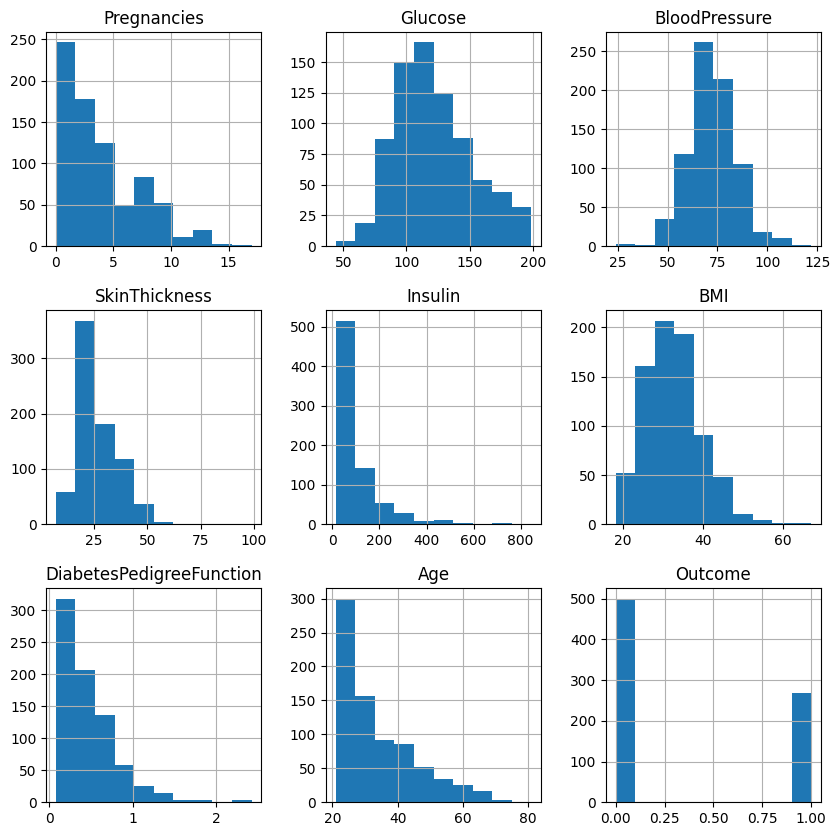

In [27]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: xlabel='DiabetesPedigreeFunction'>

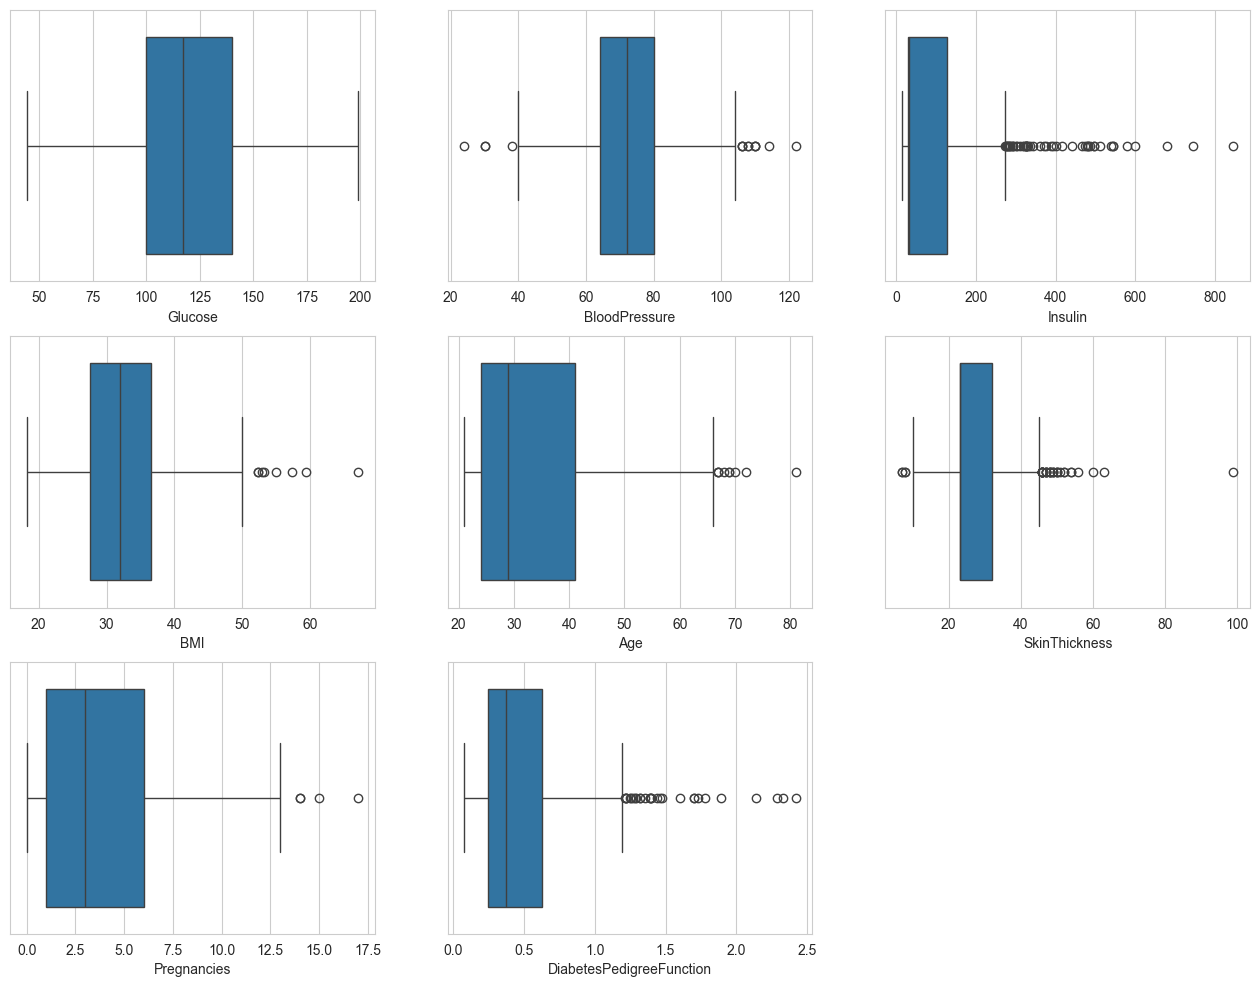

In [28]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

<Axes: >

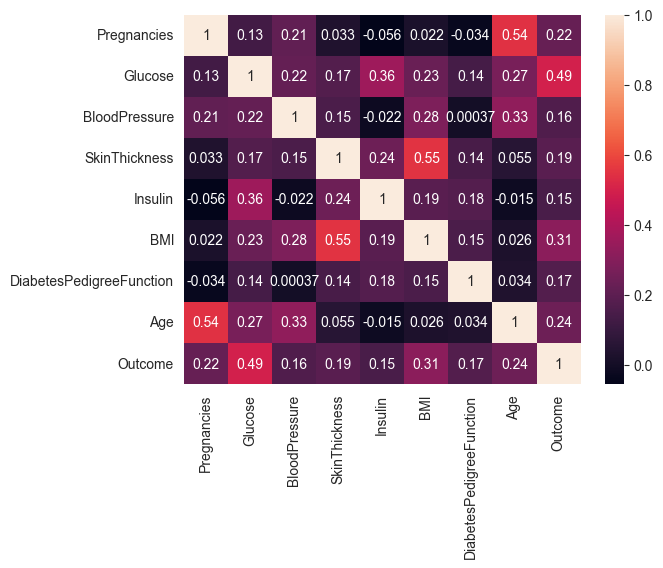

In [29]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

In [35]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [36]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


In [37]:
df_new.groupby('Outcome').mean()

,Pregnancies,Glucose,SkinThickness,BMI,Age
Outcome,,,,,
0.0,0.447923,0.398180,0.459386,0.435053,0.430072
1.0,0.567853,0.690194,0.576568,0.621423,0.621203


In [38]:
# separating the data  and labels
X = df_new.drop(columns= 'Outcome', axis=1)
y = df_new['Outcome']
print(X)

     Pregnancies   Glucose  SkinThickness       BMI       Age
0       0.747718  0.810300       0.801825  0.591265  0.889831
1       0.232725  0.091265       0.644720  0.213168  0.558670
2       0.863755  0.956975       0.357888  0.077575  0.585398
3       0.232725  0.124511       0.357888  0.284224  0.000000
4       0.000000  0.721643       0.801825  0.926988  0.606258
..           ...       ...            ...       ...       ...
763     0.940678  0.278357       0.978488  0.552803  0.976532
764     0.387223  0.561930       0.591917  0.760756  0.411995
765     0.677966  0.549544       0.357888  0.198827  0.529335
766     0.232725  0.619948       0.357888  0.385919  0.867014
767     0.232725  0.170795       0.702738  0.398957  0.200130

[768 rows x 5 columns]


In [39]:
print(y)

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64


In [40]:
# Data Standardization
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [41]:
standardized_data = scaler.transform(X)

In [42]:
print(standardized_data)

[[ 0.85092804  1.07329753  1.06190582  0.3154449   1.33615773]
 [-0.84797109 -1.41442285  0.50865557 -0.99266179  0.21042556]
 [ 1.23371797  1.58076543 -0.50142788 -1.46177591  0.3012819 ]
 ...
 [ 0.62082398  0.17113239 -0.50142788 -1.04227963  0.11070519]
 [-0.84797109  0.41471698 -0.50142788 -0.39499235  1.25859744]
 [-0.84797109 -1.13926248  0.7129679  -0.34988523 -1.00837895]]


In [43]:
X= standardized_data

In [44]:
print(X)

[[ 0.85092804  1.07329753  1.06190582  0.3154449   1.33615773]
 [-0.84797109 -1.41442285  0.50865557 -0.99266179  0.21042556]
 [ 1.23371797  1.58076543 -0.50142788 -1.46177591  0.3012819 ]
 ...
 [ 0.62082398  0.17113239 -0.50142788 -1.04227963  0.11070519]
 [-0.84797109  0.41471698 -0.50142788 -0.39499235  1.25859744]
 [-0.84797109 -1.13926248  0.7129679  -0.34988523 -1.00837895]]


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size= 0.2, stratify=y, random_state=42)

In [46]:
print(X.shape, X_train.shape, X_test.shape)

(768, 5) (614, 5) (154, 5)


In [47]:
#Training model

In [48]:
classifier = svm.SVC(kernel='linear')

In [49]:
#Training the support vector machine classifier
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [50]:
#accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [51]:
print(f'The accuracy of the model on trainng data is {training_data_accuracy}')

The accuracy of the model on trainng data is 0.7833876221498371


In [52]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [53]:
print(f'The accuracy of the model on test data is {test_data_accuracy}')

The accuracy of the model on test data is 0.7402597402597403


In [57]:
#Making predictions
print('Input the values for the following in the same order; pregnancies, glucose, SkinThickness, BMI, Age')
                    

Input the values for the following in the same order; pregnancies, glucose, SkinThickness, BMI, Age


In [58]:
input_data = (0,137,40,168,33)

In [59]:
# changing the input data to numpy array
input_data_as_np_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1, -1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)
if (prediction[0] == 0):
    print('This patient is very likely to be non- diabetic')
else:
    print('This patient is very likely to diabetic')

[[ -1.61570146 472.26287526 139.09899165 579.50223138 110.49007382]]
[1.]
This patient is very likely to diabetic
